**By means of describe we got the summary statistics of numeric features**

In [1]:
from logistic_regression import CustomLogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

data = pd.read_csv('data/diabetes.csv')

data

print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    108.00000  108.000000     108.000000     108.000000  108.000000   
mean       4.37037  118.194444      68.592593      19.120370   71.916667   
std        3.56932   33.399160      22.038215      16.289276  123.098860   
min        0.00000    0.000000       0.000000       0.000000    0.000000   
25%        1.00000   98.500000      64.000000       0.000000    0.000000   
50%        4.00000  113.500000      72.000000      20.000000    0.000000   
75%        7.00000  139.500000      80.000000      32.000000  110.000000   
max       15.00000  197.000000     122.000000      60.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  108.000000                108.000000  108.000000  108.000000  
mean    30.870370                  0.472815   33.833333    0.351852  
std      9.412373                  0.371791   11.086322    0.479774  
min      0.000000                  

**Based on the histogram, it is obvious that mostly young women have diabetes**

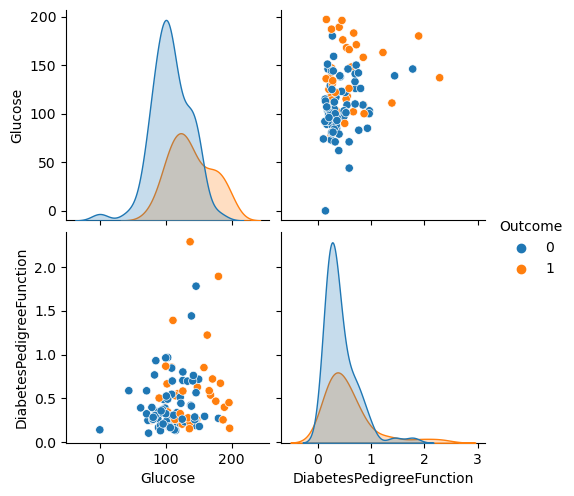

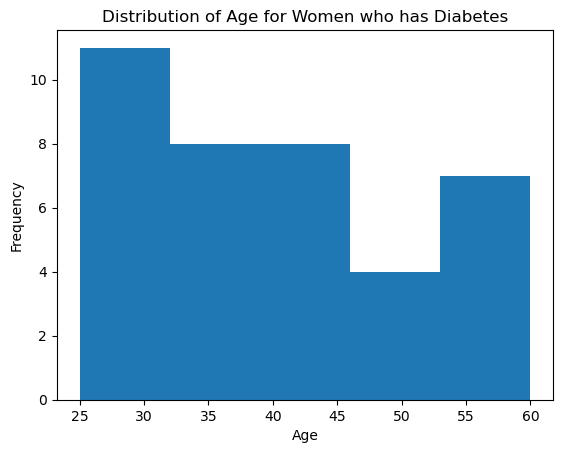

In [2]:
sns.pairplot(data=data,vars=['Glucose',  'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

plt.hist(data[data['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**The plot shows the distrubtion of independent features. The most frequent range of BMI is 25-35, for Glucose the range is 100-120, for blood pressure the range is 70-75, for skin thickness the range is 0-9, for insulin the range is 0-90, for age the range is 22-24**

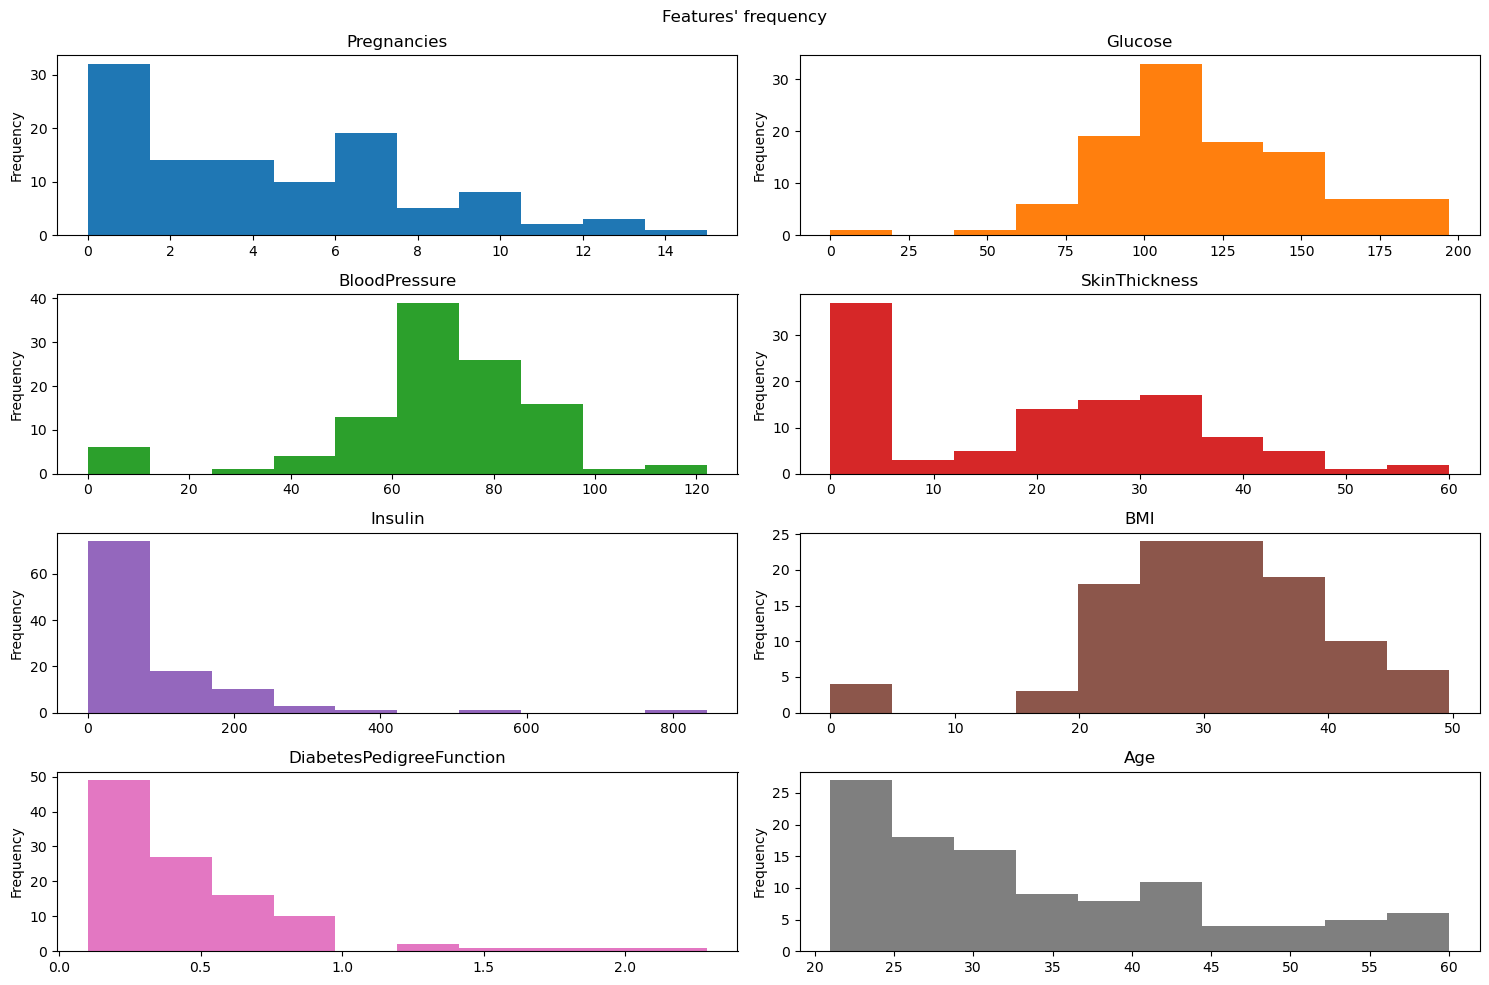

In [4]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = data.drop('Outcome', axis = 1).columns
for col in columns:
    data[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle("Features' frequency")
plt.tight_layout()
plt.show()

**According to the boxplot, women that have diabetes also have high blood pressure compared to women who don't have diabetes**

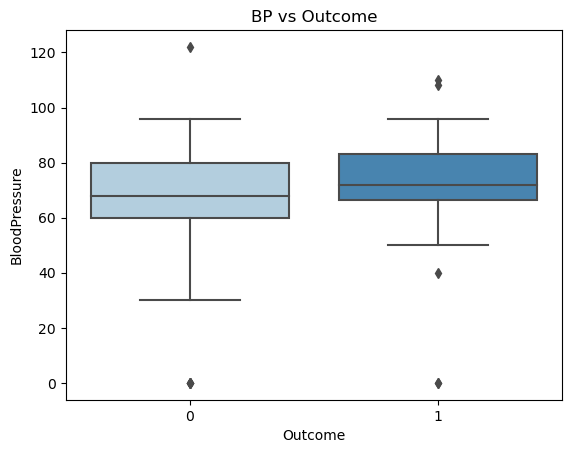

In [5]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = data, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data.iloc[:, :7].values
y = data.iloc[:,-1].values

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 45)

log_model = CustomLogisticRegression(0.001,100)

log_model.fit(xtrain, ytrain)

prediction = log_model.predict(xtest)
print(accuracy_score(prediction, ytest))

from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(xtrain,ytrain)

prediction = lreg.predict(xtest)
print(accuracy_score(prediction, ytest))

0.6060606060606061
0.6666666666666666
